In [3]:
# Ames house prices predition
# competition link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img = mpimg.imread('housesbanner.png')
imgplot = plt.imshow(img)
plt.show()

In [4]:
# reading data

train = pd.read_csv('data/train.csv')
train.set_index('Id',  inplace=True)

test = pd.read_csv('data/test.csv')
test.set_index('Id',  inplace=True)

In [ ]:
features = train.columns.values
print('Features: ', (features))

In [ ]:
train.describe()

In [ ]:
# description of the result variable
train['SalePrice'].describe()

In [ ]:
# histogram of saleprice

sn.distplot(train['SalePrice'], color="black", );

In [5]:
# combining train and test

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test), sort=False).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

In [16]:
# dealing with empty values

missing_per_col = (data.isnull().sum())
percentage = (missing_per_col * 100)/ len(data)
print(percentage[percentage > 0.1])

Series([], dtype: float64)


In [6]:
data["PoolQC"] = data["PoolQC"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')
data["MasVnrType"] = data["MasVnrType"].fillna("None")

data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

data["MSZoning"] = data.groupby("Neighborhood")["MSZoning"].transform(
    lambda x: x.fillna(x.mode()[0]))

data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [7]:
data = data.drop(['Utilities'], axis=1)

data["Functional"] = data["Functional"].fillna("Typ")
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [8]:
data['MSSubClass'] = data['MSSubClass'].apply(str)

data['OverallCond'] = data['OverallCond'].astype(str)

data['YrSold'] = data['YrSold'].astype(str)

data['MoSold'] = data['MoSold'].astype(str)

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

train = data[:ntrain]
#train['SalePrice'] = y_train
test = data[ntrain:]

In [ ]:
def plot_dtypes(df):
    # Get dataframe with count of each dtype
    dtypes = pd.DataFrame(df.dtypes, columns = ['dtype'])
    dtypes = dtypes.groupby('dtype').size().rename('count').reset_index()
    
    # Plot resulting dataframe
    ax = dtypes.sort_values('count').plot(
        'dtype',
        kind = 'barh', 
        figsize=(8,6), 
        title='Tipos de dados', 
        legend = None, 
        color = '#4A8FAD'
        )
    
    # List that will hold plt.patches data
    totals = []

    # Append patch values to list
    for i in ax.patches:
        totals.append(i.get_width())

    # Denominator for percentage
    total = sum(totals)

    # Set individual bar lables
    for i in ax.patches:
        # get_width to move left or right; get_y to move up or down
        # For regular bar, switch get_width and get_y 
        # Change get_width to get_height, get_y to get_x
        ax.text(
            i.get_width() + .3, i.get_y() + .2,
            str(round((i.get_width() / total)*100, 2))+'%', 
            fontsize=12,
            color='black'
        )
    
    plt.style.use('ggplot')
    plt.show()
    
plot_dtypes(data)    

In [ ]:
fig = plt.figure(figsize = (24, 12))

corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(
    corr, 
    mask = mask, 
    cmap = 'winter', 
    annot = True, 
    fmt=".2f")

plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.title('Matriz de correlação', fontsize = 15)
plt.savefig('corr.png')

In [ ]:
fig, ax = plt.subplots()
ax.bar(train['OverallQual'],y_train)
plt.xlabel('Qualidade geral', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], y_train, color="blue")
plt.xlabel('Área da casa em m2', fontsize=13)
plt.ylabel('Preço', fontsize=13)

fig, ax = plt.subplots()
ax.bar(train['GarageCars'], y_train, color="darkgreen")
plt.xlabel('Quantidade de vagas na garagem', fontsize=13)
plt.ylabel('Preço', fontsize=13)
plt.show()

In [ ]:
train['SalePrice'].corr(train['MasVnrArea'])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train['MasVnrArea'], y_train, color="darkred")
plt.xlabel('Área de alvenaria', fontsize=13)
plt.ylabel('Preço', fontsize=13)

In [ ]:
#print(data[data['Utilities'].values != 'AllPub'].shape[0])
print(data[data['PoolQC'].values != 'None'].shape[0])

data = data.drop(['Utilities'], axis=1)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

10


Text(0, 0.5, 'Preço')

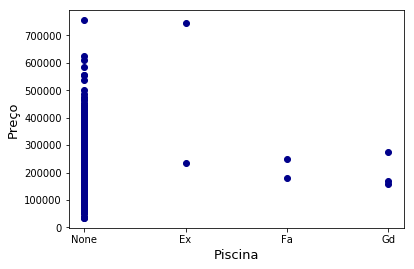

In [10]:
print(data[data['PoolQC'].values != 'None'].shape[0])

fig, ax = plt.subplots()
ax.scatter(train['PoolQC'], y_train, color="darkblue")
plt.xlabel('Piscina', fontsize=13)
plt.ylabel('Preço', fontsize=13)

In [15]:
s = (data['PoolArea']>0) & (data['PoolQC'] == 'None')
print([i for i, x in enumerate(s) if x])

t = (data['GarageYrBlt']>0) & (data['GarageType'] == 'None')
print([i for i, x in enumerate(t) if x])

a = (data['GarageFinish'] != 'None') & (data['GarageType'] == 'None')
print([i for i, x in enumerate(a) if x])

b = (data['GarageCars']>0) & (data['GarageType'] == 'None')
print([i for i, x in enumerate(b) if x])

c = (data['GarageArea']>0) & (data['GarageType'] == 'None')
print([i for i, x in enumerate(c) if x])

d = (data['GarageQual'] != 'None') & (data['GarageType'] == 'None')
print([i for i, x in enumerate(d) if x])

e = (data['GarageCond'] != 'None') & (data['GarageType'] == 'None')
print([i for i, x in enumerate(e) if x])


[2420, 2503, 2599]
[]
[]
[]
[]
[]
[]


In [10]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

data = data.apply(lbl.fit_transform)
train = data[:ntrain]

In [ ]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = train
Y = y_train
# feature extraction
model = LogisticRegression(solver="liblinear", multi_class="auto")
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [ ]:
from sklearn.decomposition import PCA

X = train
Y = y_train
# feature extraction
pca = PCA()
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

X = train
Y = y_train
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)